In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [2]:
df1 = yf.download(tickers = '3711.TW', start = '2023-01-02', end = '2024-12-31')
df2 = yf.download(tickers = '2449.TW', start = '2023-01-02', end = '2024-12-31')
df3 = yf.download(tickers = '^TWII', start = '2023-01-02', end = '2024-12-31')
df4 = yf.download(tickers = '2727.TW', start = '2023-01-02', end = '2024-12-31')
df5 = yf.download(tickers = '2330.TW', start = '2023-01-02', end = '2024-12-31')
df1 = df1['Close']
df2 = df2['Close']
df3 = df3['Close']
df4 = df4['Close']
df5 = df5['Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
df = pd.concat([df1, df2, df3, df4, df5], axis = 1)
df.columns = ['日月光投控', '京元電子', '台指', '王品', '台積電']
df.index = pd.to_datetime(df.index)
df.to_excel('/Users/xinc./Documents/GitHub/desktop-tutorial/ndhu/金融數據分析/frontier_data.xlsx')

In [4]:
df

,日月光投控,京元電子,台指,王品,台積電
Date,,,,,
2023-01-03,94.599998,36.599998,14224.120117,149.610992,453.0
2023-01-04,93.699997,36.400002,14199.129883,153.248947,449.5
2023-01-05,94.599998,36.549999,14301.049805,150.975220,458.5
2023-01-06,96.800003,36.650002,14373.339844,151.884720,458.5
2023-01-09,101.000000,37.450001,14752.209961,152.339462,481.0
...,...,...,...,...,...
2024-12-24,164.500000,114.000000,23120.240234,238.000000,1080.0
2024-12-25,165.500000,117.000000,23220.130859,238.000000,1085.0
2024-12-26,165.000000,115.500000,23246.939453,239.000000,1085.0


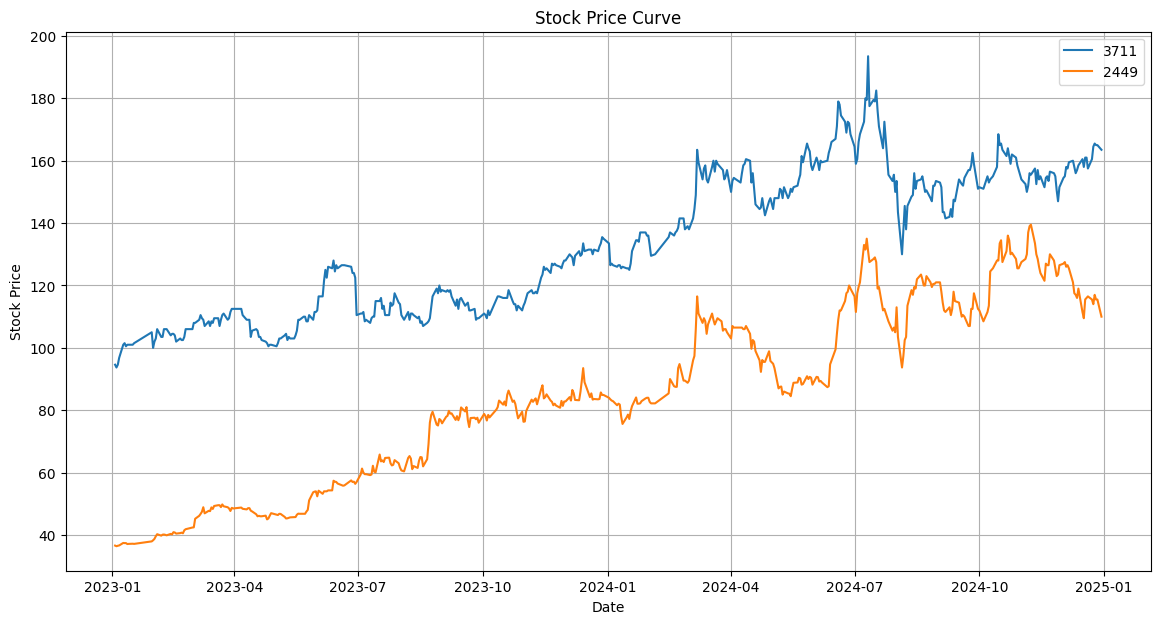

In [5]:
fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(df.index, df['日月光投控'], label = '3711')
ax.plot(df.index, df['京元電子'], label = '2449')
# ax.plot(df.index, df['台指'], label = 'TWII')
# ax.plot(df.index, df['王品'], label = '2727')
# ax.plot(df.index, df['台積電'], label = '2330')

ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_useOffset(False)

ax.grid(True)
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price')
ax.set_title('Stock Price Curve')
ax.legend()

plt.show()


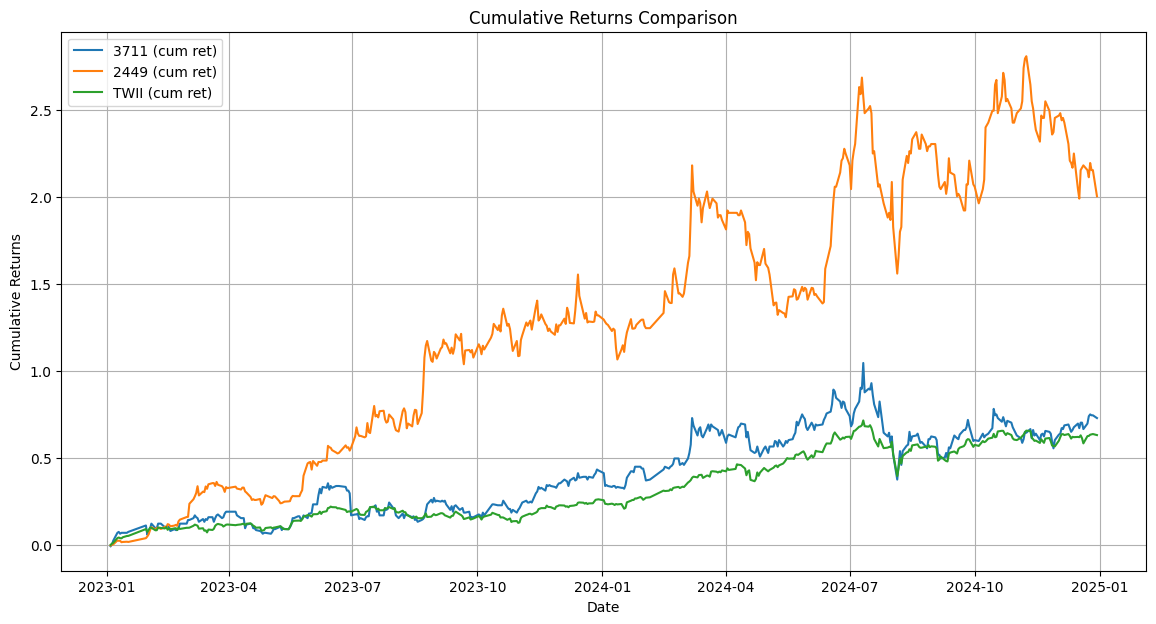

In [10]:
log_returns = np.log(df / df.shift(1))

cumulative_returns = np.exp(log_returns.cumsum()) - 1

fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(cumulative_returns.index, cumulative_returns['日月光投控'], label='3711 (cum ret)')
ax.plot(cumulative_returns.index, cumulative_returns['京元電子'], label='2449 (cum ret)')
ax.plot(cumulative_returns.index, cumulative_returns['台指'], label='TWII (cum ret)')
# ax.plot(cumulative_returns.index, cumulative_returns['王品'], label='2727 (Cumulative Returns)')
# ax.plot(cumulative_returns.index, cumulative_returns['台積電'], label='2330 (Cumulative Returns)')

ax.grid(True)
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Returns')
ax.set_title('Cumulative Returns Comparison')
ax.legend()

plt.show()

In [7]:
def calculate_mdd(series):
    cumulative_max = series.cummax()
    drawdown = (series / cumulative_max) - 1
    mdd = drawdown.min()
    return mdd

mdd_3711 = calculate_mdd(cumulative_returns['日月光投控'])
mdd_2449 = calculate_mdd(cumulative_returns['京元電子'])
mdd_twii = calculate_mdd(cumulative_returns['台指'])

print("3711（日月光投控）的最大回撤 (MDD): {:.2%}".format(mdd_3711))
print("2449（京元電子）的最大回撤 (MDD): {:.2%}".format(mdd_2449))
print("TWII（台指）的最大回撤 (MDD): {:.2%}".format(mdd_twii))

3711（日月光投控）的最大回撤 (MDD): -67.04%
2449（京元電子）的最大回撤 (MDD): -41.97%
TWII（台指）的最大回撤 (MDD): -44.85%


In [9]:
volatility_3711 = log_returns['日月光投控'].std() * np.sqrt(252)
volatility_2449 = log_returns['京元電子'].std() * np.sqrt(252)
volatility_twii = log_returns['台指'].std() * np.sqrt(252)

print("3711（日月光投控）的年化波動率: {:.2%}".format(volatility_3711))
print("2449（京元電子）的年化波動率: {:.2%}".format(volatility_2449))
print("TWII（台指）的年化波動率: {:.2%}".format(volatility_twii))

3711（日月光投控）的年化波動率: 34.35%
2449（京元電子）的年化波動率: 42.77%
TWII（台指）的年化波動率: 17.31%


In [15]:
def calculate_sharpe_ratios(df, risk_free_rate=0.04, periods=252):

    sharpe_ratios = {}
    for column in df.columns:
        mean_return = np.mean(df[column])
        std_dev = np.std(df[column])
        excess_return = mean_return - risk_free_rate / periods
        sharpe_ratios[column] = excess_return / std_dev if std_dev != 0 else np.nan
    return pd.Series(sharpe_ratios)

sharpe_ratios = calculate_sharpe_ratios(log_returns)
print(sharpe_ratios)

日月光投控    0.045495
京元電子     0.079458
台指       0.079101
王品       0.037886
台積電      0.091314
dtype: float64


In [32]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Sunburst(
    labels=["總市場", "京元電子", "其他市場", "半導體封測", "其他業務"],
    parents=["", "總市場", "總市場", "京元電子", "京元電子"],
    values=[100, 8.9, 91.1, 7.8231, 1.0769],
    branchvalues="total"
))

fig.update_layout(
    title = dict(text = "日月光投控的市場佔有率與營收結構", font = dict(size = 20)),
    margin = dict(t=40, l=0, r=0, b=0),
    width=1200,
    height=900,
    font = dict(size = 40)
)

fig.show()